In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px 

In [2]:
database = pd.read_csv('https://raw.githubusercontent.com/ProfLeandroLessa/TP-M1-ABD/master/dataset/custo_diaria.csv', sep =';')
database.head(10)

,qtd_pessoas,valor_diaria
0,1,150
1,3,200
2,4,650
3,6,499
4,7,549
5,10,980
6,12,700
7,13,735
8,15,859
9,16,900


In [ ]:
database.describe()

,qtd_pessoas,valor_diaria
count,30.000000,30.000000
mean,28.600000,1648.633333
std,18.189804,950.522197
min,1.000000,150.000000
25%,13.500000,869.250000
50%,26.000000,1627.500000
75%,44.500000,2497.000000
max,60.000000,3300.000000


In [ ]:
qtd_pessoas = database['qtd_pessoas'].sum()
soma_valor_diaria = database['valor_diaria'].sum()

In [ ]:
media_valord = soma_valor_diaria / qtd_pessoas
media_valord

57.64452214452214

In [ ]:
desvio_padrao = database.std()
desvio_padrao

qtd_pessoas      18.189804
valor_diaria    950.522197
dtype: float64

In [ ]:
database.mean()

qtd_pessoas       28.600000
valor_diaria    1648.633333
dtype: float64

In [ ]:
correlacao = database.corr()
correlacao

,qtd_pessoas,valor_diaria
qtd_pessoas,1.000000,0.978666
valor_diaria,0.978666,1.000000


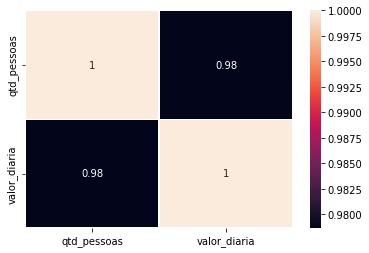

In [ ]:
plot = sns.heatmap(correlacao, annot = True, linewidths = .3)
plot

In [ ]:
x_qtd_pessoas = database.iloc[ : , 0].values
x_qtd_pessoas

array([ 1,  3,  4,  6,  7, 10, 12, 13, 15, 16, 20, 18, 22, 23, 25, 27, 30,
       32, 33, 40, 42, 43, 45, 47, 50, 51, 52, 53, 58, 60])

In [ ]:
y_custo_diarias = database.iloc[ : , 1].values
y_custo_diarias

array([ 150,  200,  650,  499,  549,  980,  700,  735,  859,  900, 1100,
        989, 1075, 1378, 1500, 1755, 1850, 2500, 2000, 1900, 2089, 2500,
       2250, 2488, 2680, 2803, 2890, 3040, 3150, 3300])

In [ ]:
np.corrcoef(x_qtd_pessoas, y_custo_diarias)

array([[1.        , 0.97866601],
       [0.97866601, 1.        ]])

In [ ]:
x_qtd_pessoas.shape

(30,)

In [ ]:
x_qtd_pessoas = x_qtd_pessoas.reshape(-1 , 1)

In [ ]:
y_custo_diarias = y_custo_diarias.reshape(-1 , 1)

In [ ]:
from sklearn.linear_model import LinearRegression
previsao_custo_diaria = LinearRegression()

In [ ]:
type(previsao_custo_diaria)

sklearn.linear_model._base.LinearRegression

In [ ]:
previsao_custo_diaria.fit(x_qtd_pessoas, y_custo_diarias)

LinearRegression()

In [ ]:
previsao_custo_diaria.intercept_

array([186.00229281])

In [ ]:
previsao_custo_diaria.coef_

array([[51.14094547]])

In [ ]:
previsao_precos = previsao_custo_diaria.predict(y_custo_diarias)
previsao_precos

array([[  7857.14411372],
       [ 10414.19138736],
       [ 33427.61685009],
       [ 25705.33408371],
       [ 28262.38135735],
       [ 50304.12885609],
       [ 35984.66412373],
       [ 37774.59721527],
       [ 44116.07445389],
       [ 46212.85321828],
       [ 56441.04231282],
       [ 50764.39736535],
       [ 55162.518676  ],
       [ 70658.22515424],
       [ 76897.42050192],
       [ 89938.36159747],
       [ 94796.75141738],
       [128038.36597465],
       [102467.89323829],
       [ 97353.79869101],
       [107019.43738536],
       [128038.36597465],
       [115253.12960647],
       [127424.67462898],
       [137243.73615975],
       [143534.07245289],
       [147983.33470902],
       [155654.47652993],
       [161279.98053193],
       [168951.12235284]])

In [ ]:
previsao_pessoas = previsao_custo_diaria.predict(x_qtd_pessoas)
previsao_pessoas

array([[ 237.14323829],
       [ 339.42512923],
       [ 390.5660747 ],
       [ 492.84796565],
       [ 543.98891112],
       [ 697.41174754],
       [ 799.69363849],
       [ 850.83458396],
       [ 953.1164749 ],
       [1004.25742038],
       [1208.82120227],
       [1106.53931132],
       [1311.10309321],
       [1362.24403869],
       [1464.52592963],
       [1566.80782058],
       [1720.230657  ],
       [1822.51254794],
       [1873.65349341],
       [2231.64011172],
       [2333.92200267],
       [2385.06294814],
       [2487.34483909],
       [2589.62673003],
       [2743.04956645],
       [2794.19051192],
       [2845.3314574 ],
       [2896.47240287],
       [3152.17713023],
       [3254.45902118]])

In [ ]:
previsao_precos[25]

array([143534.07245289])

In [ ]:
x_qtd_pessoas = x_qtd_pessoas.ravel()

In [ ]:
y_custo_diarias = y_custo_diarias.ravel()

In [ ]:
grafico = pd.plotting.scatter_matrix(database, figsize = (30,30))

In [ ]:
x = 27
previsao_custo_diaria.intercept_ + previsao_custo_diaria.coef_ + x

array([[264.14323829]])

In [ ]:
previsao_custo_diaria.predict([[25]])

array([[1464.52592963]])

In [ ]:
previsao_custo_diaria.score(x_qtd_pessoas, y_custo_diarias)

0.9577871649322629

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
MSE = mean_squared_error(y_custo_diarias, previsao_pessoas)
MSE

36867.67840031127

In [ ]:
mean_absolute_error(y_custo_diarias, previsao_pessoas)

138.91296481574125

In [ ]:
np.sqrt(MSE)

192.0095789285297